In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
data=pd.read_csv('StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
# Questions for Analysis:
# General Analysis:

# What is the average exam score for students based on their gender?
# How does attendance percentage correlate with exam scores?
# Is there a significant difference in exam scores between students with access to resources and those without?
# Category-Specific Analysis:

# How does parental involvement (Low, Medium, High) impact exam scores?
# What is the impact of family income level (Low, Medium, High) on student performance?
# Do students from private schools perform better than those from public schools?
# Correlation and Trends:

# Which variable (e.g., sleep hours, hours studied, tutoring sessions) shows the highest correlation with exam scores?
# Is there a relationship between motivational levels and exam scores?
# Predictive Insights:

# Can previous scores predict current exam scores? If so, what is the strength of the relationship?
# Are students with high teacher quality more likely to score better?
# Health and Lifestyle:

# How does physical activity (hours per week) affect exam performance?
# Do sleep hours significantly influence exam scores?
# Intervention Strategies:

# Which group of students (e.g., based on gender, family income, or distance from school) would benefit the most from additional tutoring sessions?
# How can schools address disparities in performance due to peer influence (Positive, Neutral, Negative)?

In [20]:
#First getting what present in that  data 
#ANS: 1]Null values: No
#     2]Datatype: int64(7), object(13)
#     3]Columns : 20
#     4]Rows:6607
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [30]:
# From here we can see that the data is cleaned 
data.duplicated().sum()

0

In [6]:
# getting insight of data.
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


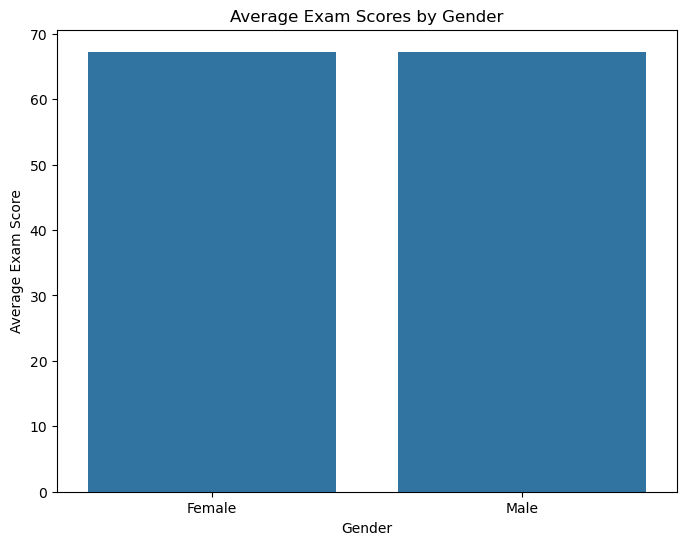

(   Gender  Exam_Score
 0  Female   67.244898
 1    Male   67.228894,
 None)

In [8]:
#Q1. What is the average exam score for students based on their gender?
plt.figure(figsize=(8, 6))
avg_score_gender=data.groupby('Gender')['Exam_Score'].mean().reset_index()
avg_score_gender
#     Gender   Exam_Score
# 0   Female   67.244898
# 1   Male     67.228894,
#Ans: From that we can see there is slight difference(mostly same) bet female and male.

# Visualization
sns.barplot(x='Gender', y='Exam_Score', data=avg_score_gender)
plt.title('Average Exam Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
avg_score_gender,plt.show()

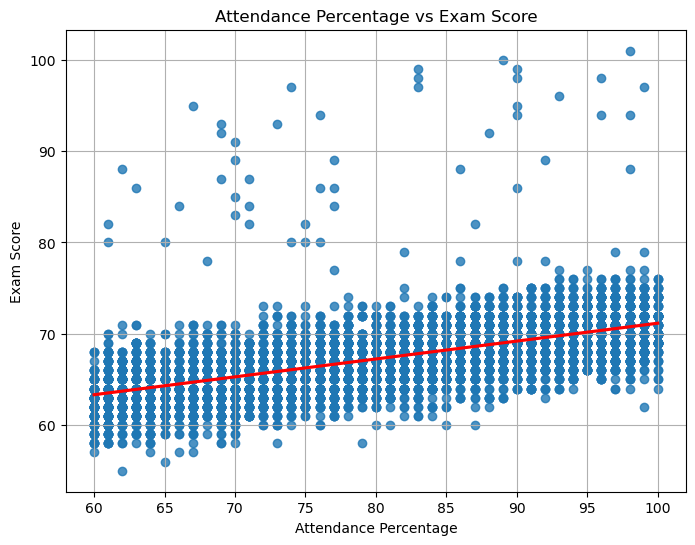

In [103]:
#Q2. How does attendance percentage correlate with exam scores?
Attenper_Corr_Score=data['Attendance'].corr(data['Exam_Score'])
Attenper_Corr_Score
#Ans:0.5810718633120646 Moderate Correlation (Attendance percentage & Exam Score )

#visualization
plt.figure(figsize=(8, 6))
sns.regplot(x='Attendance', y='Exam_Score', data=data,  line_kws={'color':'red'})
plt.title('Attendance Percentage vs Exam Score')
plt.xlabel('Attendance Percentage')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()
# Graph Understanding : (Attendance Increase Marks Increase).

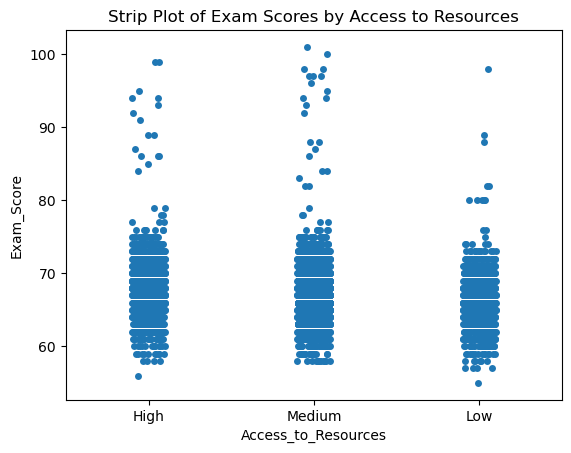

In [54]:
# Q3. Is there a significant difference in exam scores between students with access to resources and those without?
# Split into two groups
group_with_resources = data[data['Access_to_Resources'].isin(['High', 'Medium'])]['Exam_Score']
group_without_resources = data[data['Access_to_Resources'] == 'Low']['Exam_Score']

# Perform independent t-test
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(group_with_resources, group_without_resources)
# Ans:T-Statistic: 117.40562294331326, P-Value: 3.952845930714051e-27

# Ans: Since p-value < alpha,alpha=0.05 you reject the null hypothesis.
# This means there is a significant difference in exam scores between students with and without access to resources.

# Visualization:
sns.stripplot(x='Access_to_Resources', y='Exam_Score', data=data, jitter=True)
plt.title('Strip Plot of Exam Scores by Access to Resources')
plt.show()

#FinalAns: The significant difference suggests that students with access to resources (High/Medium ) have higher exam scores compared to (Low).

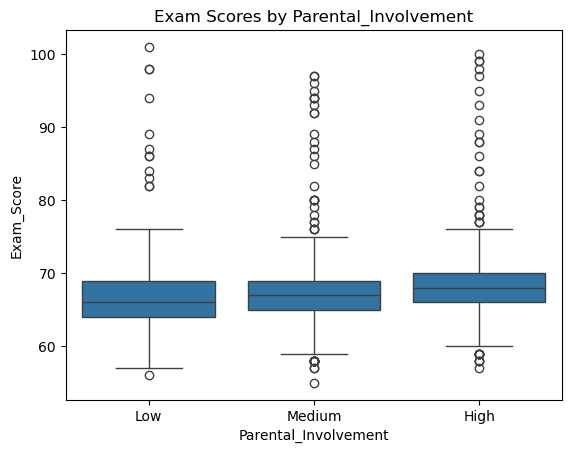

(None, 86.35537053085646, 2.0017239124114475e-20)

In [52]:
# How does parental involvement (Low, Medium, High) impact exam scores?
group_with_resources = data[data['Parental_Involvement'].isin(['High', 'Medium'])]['Exam_Score']
group_without_resources = data[data['Parental_Involvement'] == 'Low']['Exam_Score']

from scipy.stats import f_oneway
f_stat,p_value=f_oneway(group_with_resources,group_without_resources)
f_stat,p_value
# Ans: (None, 86.35537053085646, 2.0017239124114475e-20)
# Ans: Since p-value < alpha,alpha=0.05 you reject the null hypothesis.
# This means there is a significant difference in exam scores between Parental involvement

sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=data)
plt.title('Exam Scores by Parental_Involvement')
plt.show(),f_stat,p_value
#FinalAns: The significant difference suggests that parental involvement (High/Medium ) have higher exam scores compared to (Low).

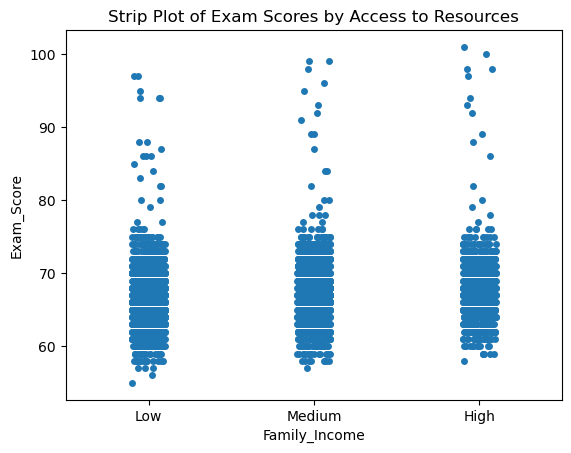

(44.74056224430833, 2.4338393447527685e-11)

In [58]:
#Q4. What is the impact of family income level (Low, Medium, High) on student performance?
# Split into two groups
group_with_goodincome = data[data['Family_Income'].isin(['High', 'Medium'])]['Exam_Score']
group_without_goodincome = data[data['Family_Income'] == 'Low']['Exam_Score']

# Perform independent t-test
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(group_with_goodincome, group_without_goodincome)
# Ans:(44.74056224430833, 2.4338393447527685e-11)

# Ans: Since p-value < alpha,alpha=0.05 you reject the null hypothesis.
# This means there is a significant difference in family income on exam score.

# Visualization:
sns.stripplot(x='Family_Income', y='Exam_Score', data=data, jitter=True)
plt.title('Strip Plot of Exam Scores by Access to Resources')
plt.show()
#FinalAns: The significant difference suggests that students family income (High/Medium ) have higher exam scores compared to (Low).

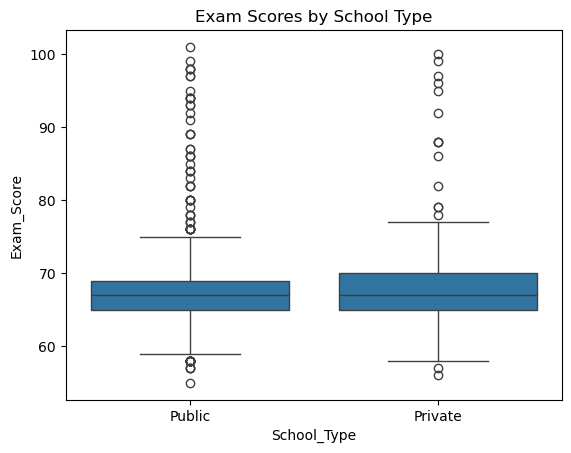

In [66]:
# Do students from private schools perform better than those from public schools?

from scipy import stats
# Separate the data into private and public school groups
private_scores = data[data['School_Type'] == 'Private']['Exam_Score']
public_scores = data[data['School_Type'] == 'Public']['Exam_Score']

# Perform  independent t-test
t_stat, p_value = stats.ttest_ind(private_scores, public_scores)
#Ans:T-statistic 0.7187537041931684, P-value: 0.47231811262174417
# Ans: Since p-value < alpha,alpha=0.05 you reject the null hypothesis.

sns.boxplot(x='School_Type', y='Exam_Score', data=data)
plt.title('Exam Scores by School Type')
plt.show()
# This means there is a significant difference in private school & public school on exam scores.

In [74]:

# How can schools address disparities in performance due to peer influence (Positive, Neutral, Negative)?


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


Exam_Score           1.000000
Hours_Studied        0.445455
Tutoring_Sessions    0.156525
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64


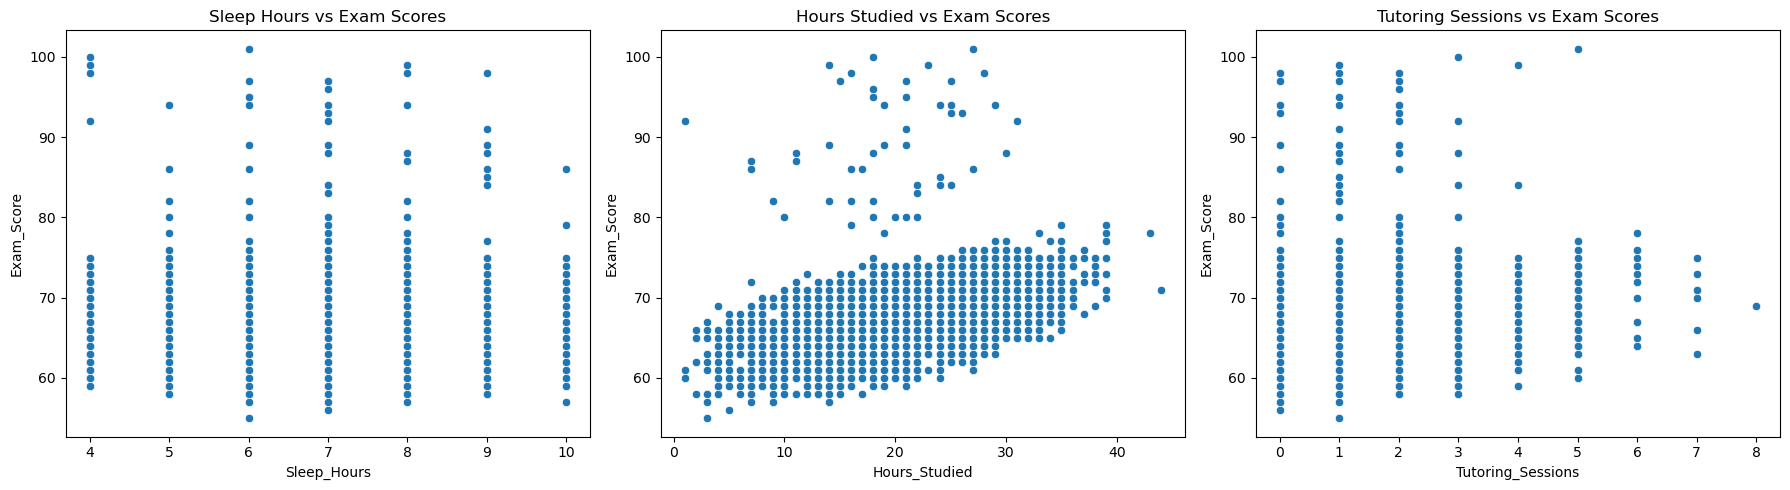

In [100]:
# Which variable (e.g., sleep hours, hours studied, tutoring sessions) shows the highest correlation with exam scores?
# Calculate correlation
correlations = data[['Sleep_Hours', 'Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']].corr()
print(correlations['Exam_Score'].sort_values(ascending=False))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for Sleep Hours vs Exam Scores
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=data, ax=axes[0],)
axes[0].set_title('Sleep Hours vs Exam Scores')

# Plot for Hours Studied vs Exam Scores
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data, ax=axes[1])
axes[1].set_title('Hours Studied vs Exam Scores')

# Plot for Tutoring Sessions vs Exam Scores
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=data, ax=axes[2])
axes[2].set_title('Tutoring Sessions vs Exam Scores')

# Adjust layout
plt.tight_layout()
plt.show()

#Hours_Studied shows the most significant positive relationship with exam scores.
#Tutoring_Sessions has a weak positive impact.
#Sleep_Hours has almost no correlation with exam scores.

0.17507908702291072


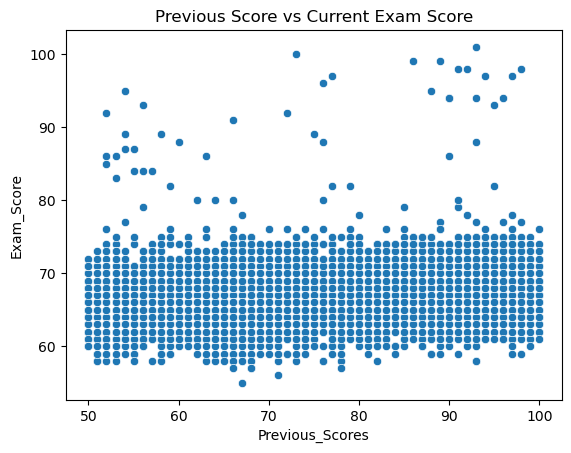

In [108]:
# Can previous scores predict current exam scores? If so, what is the strength of the relationship?
# Assuming 'Previous_Score' and 'Exam_Score' are the column names
correlation = data[['Previous_Scores', 'Exam_Score']].corr()
print(correlation['Exam_Score']['Previous_Scores'])

sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=data)
plt.title('Previous Score vs Current Exam Score')
plt.show()

#Ans: Suggesting that previous scores do not strongly predict current exam scores.

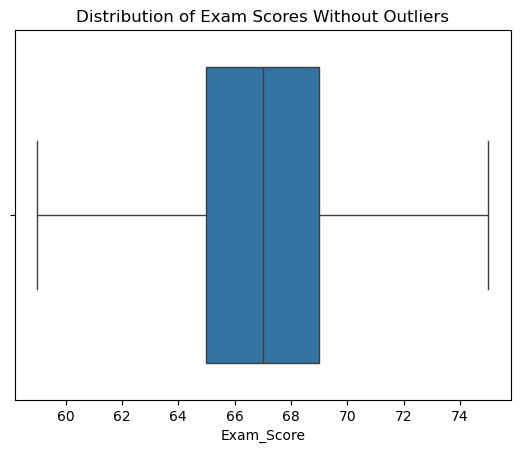

Teacher_Quality
High      67.538264
Low       66.648402
Medium    67.012739
Name: Exam_Score, dtype: float64


In [144]:
# Are students with high teacher quality more likely to score better?
# Calculate Q1 & Q3
Q1 = data['Exam_Score'].quantile(0.25)
Q3 = data['Exam_Score'].quantile(0.75)

# Calculate the Interquartile Range
IQR = Q3 - Q1
# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = data[(data['Exam_Score'] < lower_bound) | (data['Exam_Score'] > upper_bound)]

cleaned_data = data[(data['Exam_Score'] >= lower_bound) & (data['Exam_Score'] <= upper_bound)]
data['Exam_Score'] = data['Exam_Score'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(x='Exam_Score', data=data, showfliers=False)
plt.title('Distribution of Exam Scores Without Outliers')
plt.show()

group_by_teacher_quality = data.groupby('Teacher_Quality')['Exam_Score'].mean()
print(group_by_teacher_quality)

#Students with high teacher quality have the highest average exam scores (67.54).
#Students with low teacher quality have the lowest average exam scores (66.65).
#Students with medium teacher quality fall in between (67.01).

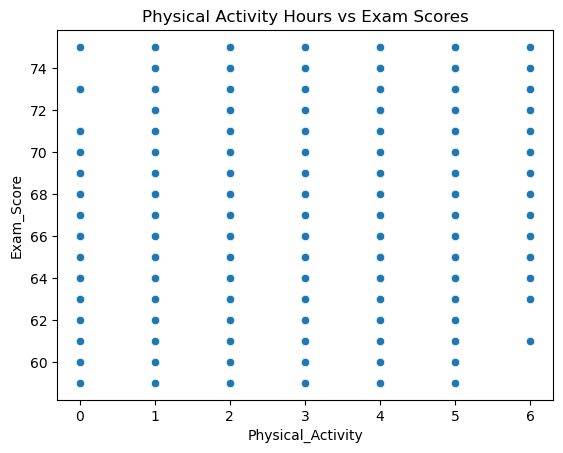

0.0372631870876829


In [152]:
# How does physical activity (hours per week) affect exam performance?
sns.scatterplot(x='Physical_Activity', y='Exam_Score', data=data)
plt.title('Physical Activity Hours vs Exam Scores')
plt.show()
correlation = data[['Physical_Activity', 'Exam_Score']].corr()
print(correlation['Exam_Score']['Physical_Activity'])
# Physical activity doesnot affect exam performance?

Correlation between Sleep Hours and Exam Scores: -0.014135885047444487


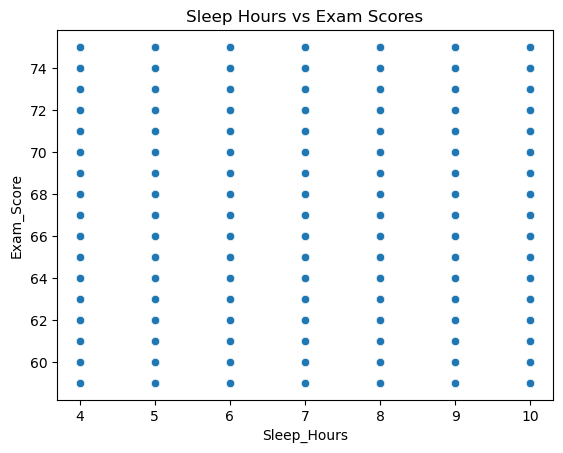

In [156]:
# Do sleep hours significantly influence exam scores?
correlation = data[['Sleep_Hours', 'Exam_Score']].corr()
print(f"Correlation between Sleep Hours and Exam Scores: {correlation['Exam_Score']['Sleep_Hours']}")
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=data)
plt.title('Sleep Hours vs Exam Scores')
plt.show()
# Ans:it does not affect

Gender
Female    67.109918
Male      67.139748
Name: Exam_Score, dtype: float64
Family_Income
High      67.656422
Low       66.762350
Medium    67.240810
Name: Exam_Score, dtype: float64
Distance_from_Home
Far         66.331307
Moderate    66.887387
Near        67.397271
Name: Exam_Score, dtype: float64


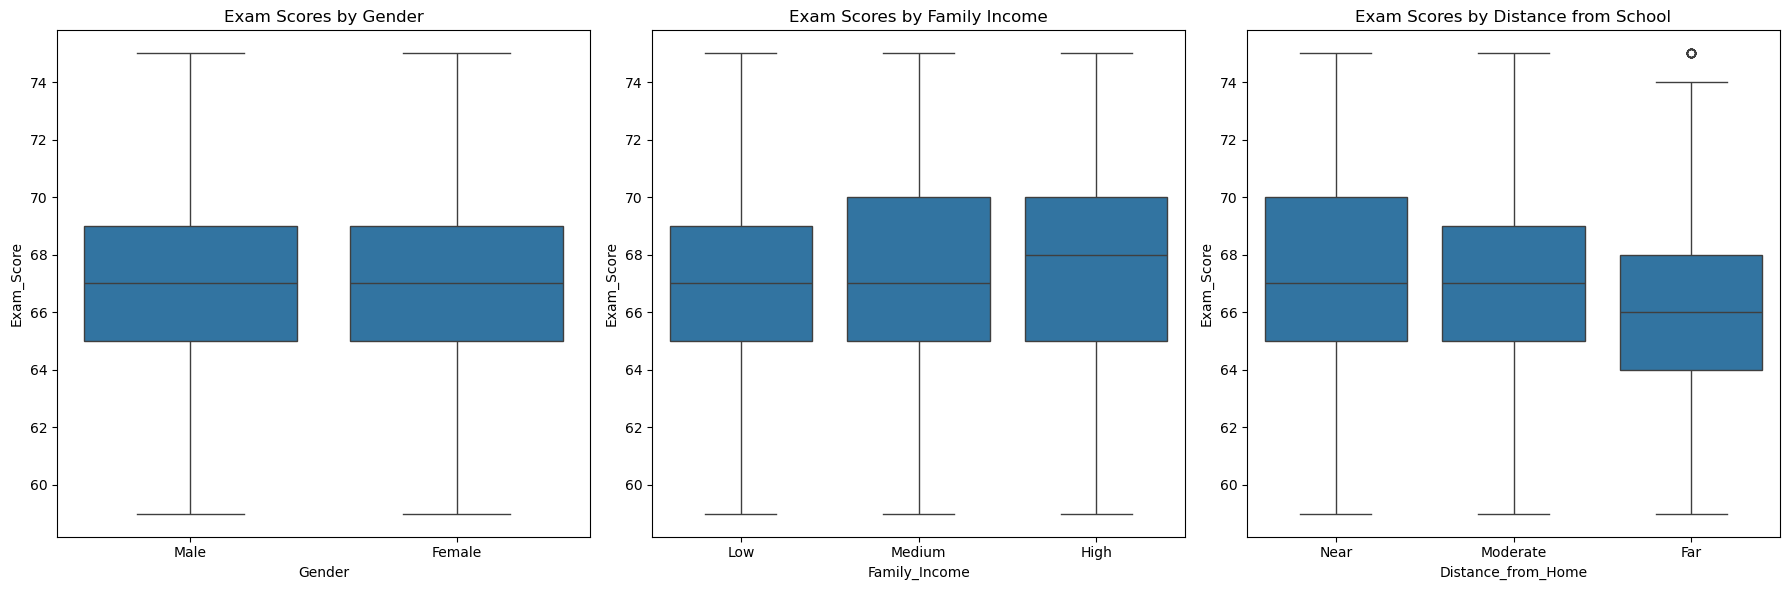

In [166]:
# Which group of students (e.g., based on gender, family income, or distance from school) would benefit the most from additional tutoring sessions?
# Grouping by Gender
gender_performance = data.groupby('Gender')['Exam_Score'].mean()

#Family_Income: low, medium, high
income_performance = data.groupby('Family_Income')['Exam_Score'].mean()

# Distance_from_School is categorical
distance_performance = data.groupby('Distance_from_Home')['Exam_Score'].mean()

print(gender_performance)
print(income_performance)
print(distance_performance)

import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gender
sns.boxplot(x='Gender', y='Exam_Score', data=data, ax=axes[0])
axes[0].set_title('Exam Scores by Gender')

# FamilyIncome
sns.boxplot(x='Family_Income', y='Exam_Score', data=data, ax=axes[1])
axes[1].set_title('Exam Scores by Family Income')

# Distance from School
sns.boxplot(x='Distance_from_Home', y='Exam_Score', data=data, ax=axes[2])
axes[2].set_title('Exam Scores by Distance from School')

plt.tight_layout()
plt.show()

#Gender seems to have little to no effect on exam scores.
#Family income may play a role, with higher-income students performing slightly better on average.
#Distance from home shows that students who live closer to the school tend to score higher.

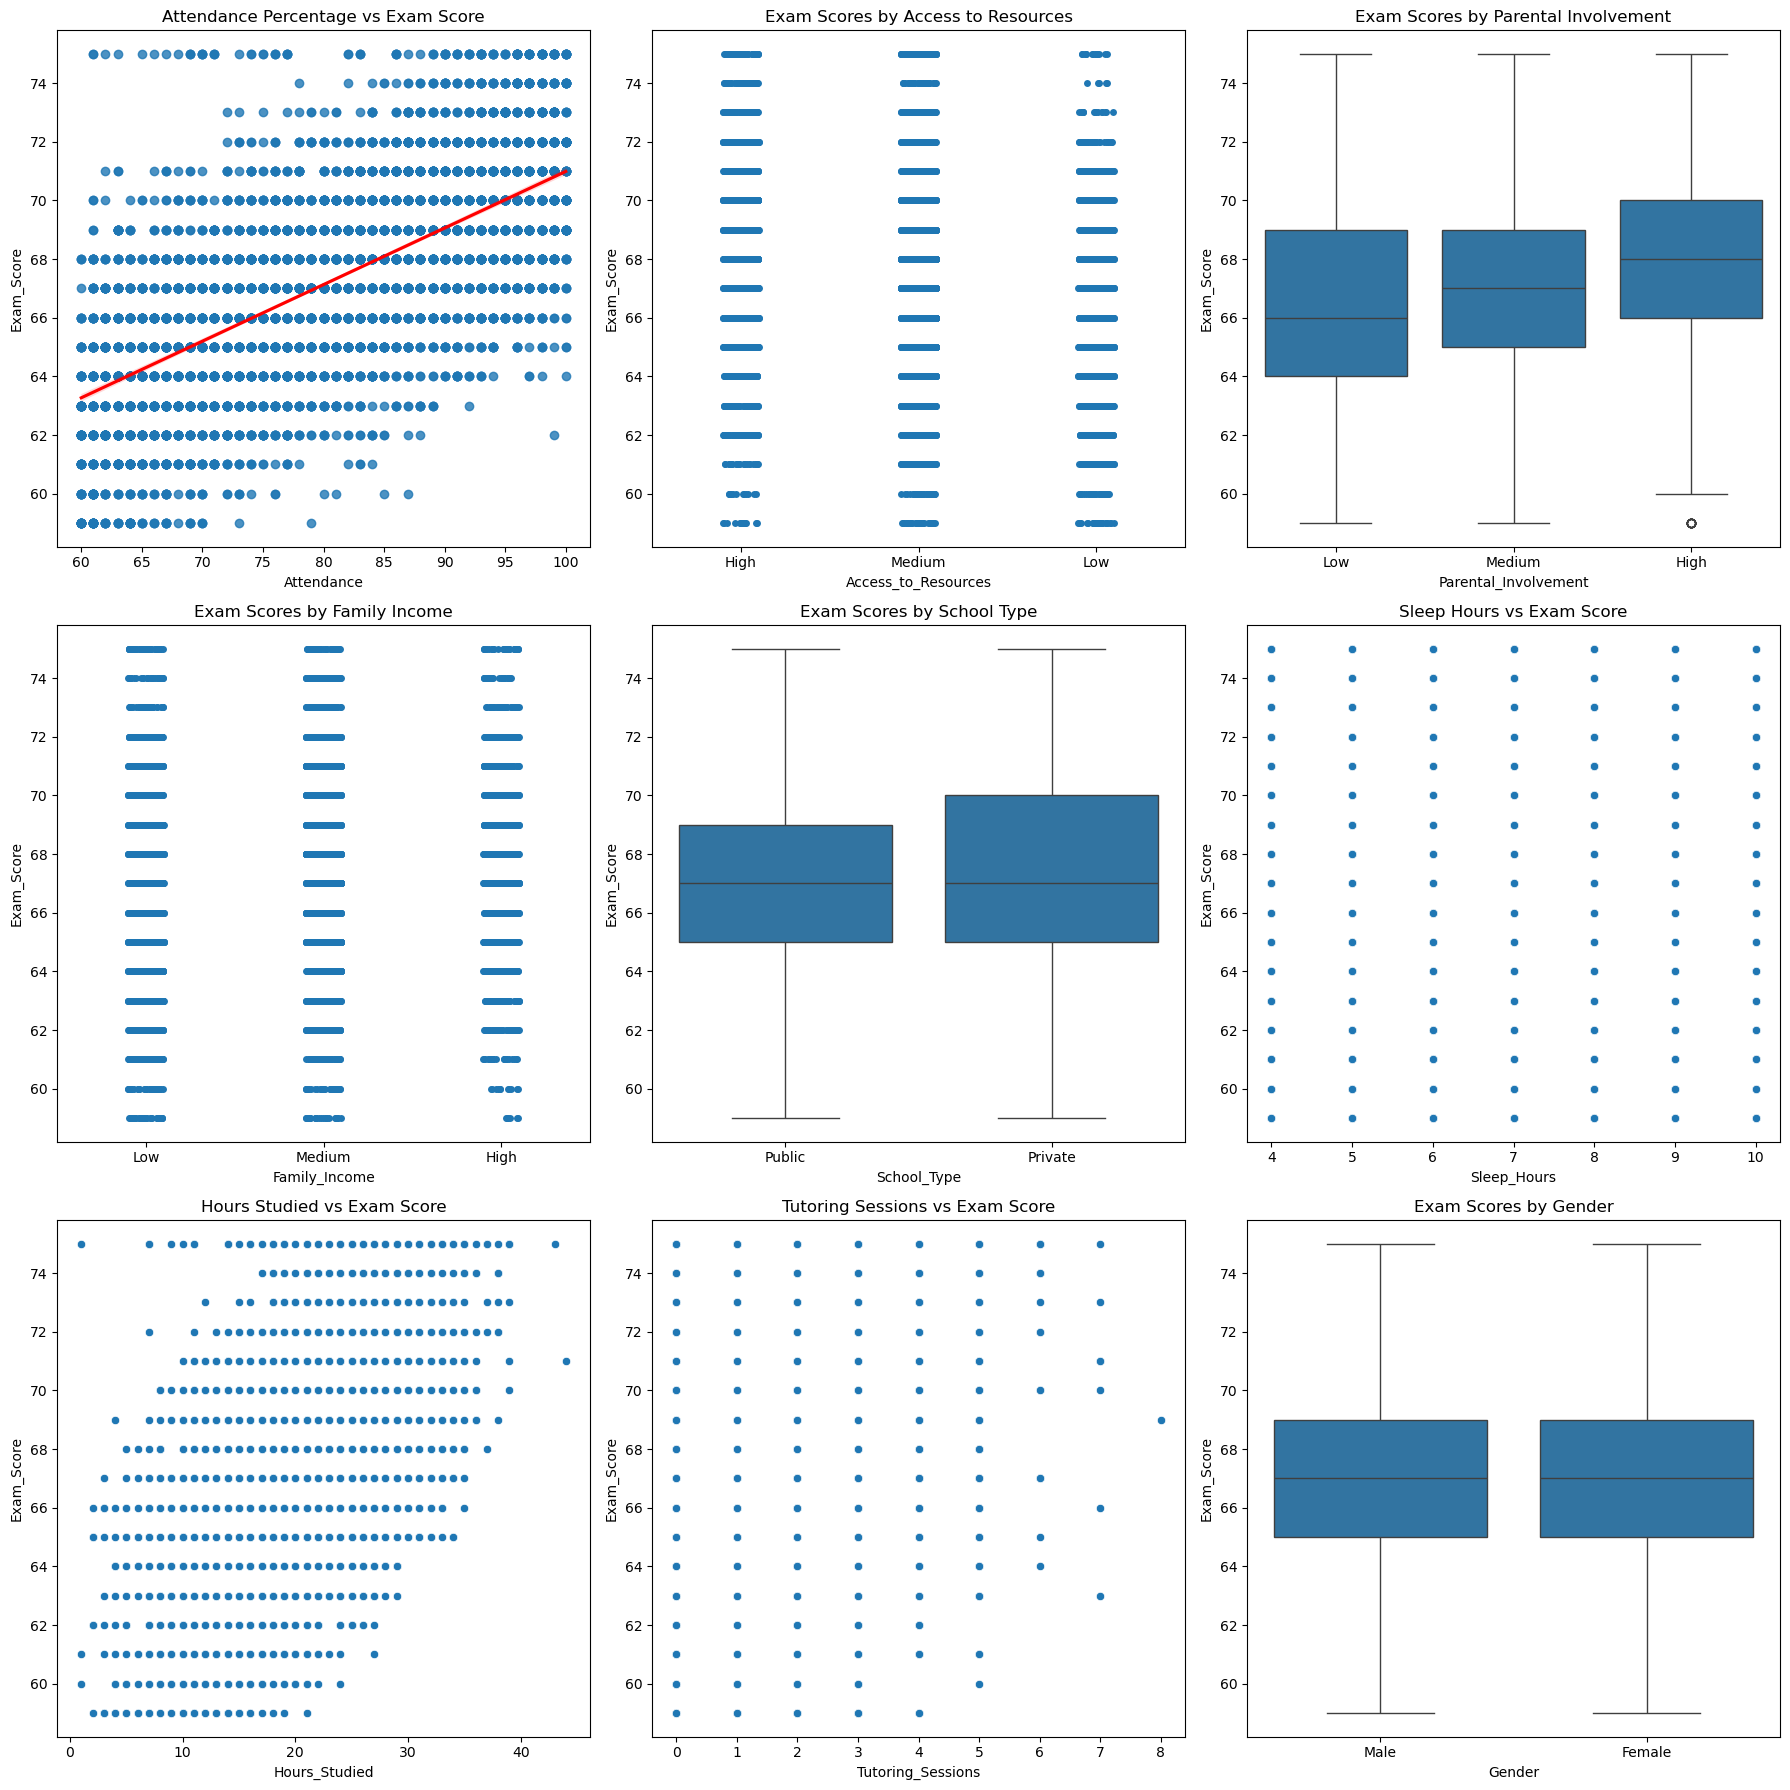

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # 3x3 grid for all plots

# 1. Attendance vs Exam Score
sns.regplot(x='Attendance', y='Exam_Score', data=data, line_kws={'color': 'red'}, ax=axes[0, 0])
axes[0, 0].set_title('Attendance Percentage vs Exam Score')

# 2. Access to Resources vs Exam Score
sns.stripplot(x='Access_to_Resources', y='Exam_Score', data=data, jitter=True, ax=axes[0, 1])
axes[0, 1].set_title('Exam Scores by Access to Resources')

# 3. Parental Involvement vs Exam Score
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Exam Scores by Parental Involvement')

# 4. Family Income vs Exam Score
sns.stripplot(x='Family_Income', y='Exam_Score', data=data, jitter=True, ax=axes[1, 0])
axes[1, 0].set_title('Exam Scores by Family Income')

# 5. School Type vs Exam Score
sns.boxplot(x='School_Type', y='Exam_Score', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Exam Scores by School Type')

# 6. Sleep Hours vs Exam Score
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Sleep Hours vs Exam Score')

# 7. Hours Studied vs Exam Score
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Hours Studied vs Exam Score')

# 8. Tutoring Sessions vs Exam Score
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Tutoring Sessions vs Exam Score')

# 9. Gender, Family Income, Distance from School
sns.boxplot(x='Gender', y='Exam_Score', data=data, ax=axes[2, 2])
axes[2, 2].set_title('Exam Scores by Gender')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [ ]:
# Analysis:
# ---------
# From that Analysis we can say that:
# 1. The most important factor that improves students performance are.

# Affect Exam Score:
# -----------------
# 1. Attendance percentage= Moderate
# 2. Access to Resources = High.
# 3. Parental Involvement = High
# 4. Family Income = High
# 5. Hours_Studied = High
# 6. Teacher Quality = High
# 7. Distance = High.
# 8. Private School & Public School=High
# 9. Family income = Slightly.
               
# 2.The most important factor that not improves students performance are.
# Does not affect Exam score.
# ------------------------
# 1.Physical activity.
# 2.Gender
# 3.Sleep hours 
# 4.Tutoring_Sessions.

In [ ]:
# Actionable Insights in Short:
#---------------------------------
# Improve Attendance: We can offer incentives it can be improve attendance .
# Parental Involvement: Organize workshops and maintain communication with parents.
# Support Low-Income Families: Offer financial Assistance and scholarships.
# Study Habits: Train students in time management and effective study techniques.
# Teacher Quality: Provide professional development for teachers.
# Distance Barriers: Provide transportation or online learning options for distant students.
# Private School Benefits: Adopt successful practices from private schools in public systems.
# Physical Activity: Promote wellness programs for overall well-being.
# Improve Tutoring Programs: Tailor tutoring to struggling students and ensure quality.
# Promote Healthy Sleep: Offer workshops on sleep hygiene and stress management.